In [71]:
# -*- coding: utf-8 -*-
import json
import math
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams['font.sans-serif']=['MS Gothic']
matplotlib.rcParams['axes.unicode_minus']=False

with open('paimon-moe-local-data.json','r') as f:
    json_file = json.load(f)

In [72]:
characters_5star_list = [
    "mona",
    "kamisato_ayaka",
    "qiqi",
    "raiden_shogun",
    "jean",
    "albedo",
    "shenhe",
    "zhongli",
    "yae_miko"]
characters_5star_wish_count = 0
wish_count = 580 + 171
data = json_file.get("wish-counter-character-event")["pulls"]
for i in data:
    if i["id"] in characters_5star_list:
        characters_5star_wish_count += 1
data2 = json_file.get("wish-counter-standard")["pulls"]
for i in data2:
    if i["id"] in characters_5star_list:
        characters_5star_wish_count += 1
print("星５獲得回数: {:.2f}".format(characters_5star_wish_count))
p1 = characters_5star_wish_count/wish_count
print("星５の確率: {:.6f}".format(p1))
print("星５の期待値: {:.6f}".format(1/p1))
print("標準偏差： {:.6f}".format(math.sqrt((1-p1)/(p1*p1))))

星５獲得回数: 12.00
星５の確率: 0.015979
星５の期待値: 62.583333
標準偏差： 62.081320


In [73]:
mean,variance,skewness,kurtosis=stats.geom.stats(p1,moments="mvsk")
print("E(X):",mean)
print("V(X):",math.sqrt(variance))
print("歪度:",skewness)
print("尖度:",kurtosis)

E(X): 62.583333333333336
V(X): 62.08131987786486
歪度: 2.00006486509863
尖度: 6.000259464602001


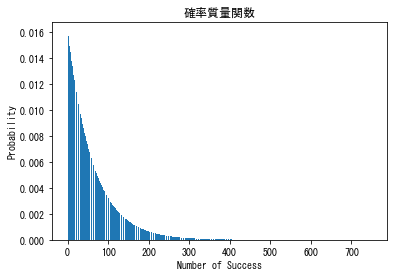

In [74]:
n=wish_count
p=p1
x=range(0,n)
pmf_result=stats.geom.pmf(x,p)

plt.bar(x,pmf_result)
plt.xlabel('Number of Success')
plt.ylabel('Probability')
plt.title("確率質量関数")
plt.show()

In [75]:
z = 1.96
p1_standard_error = z * (math.sqrt((p1*(1-p1))/wish_count))
print("標準誤差：{:.6f}".format(p1_standard_error))
print("母集団確率範囲：[{:.6f},{:.6f}]".format(p1 + p1_standard_error,p1 - p1_standard_error))

標準誤差：0.008968
母集団確率範囲：[0.024947,0.007010]


In [76]:
lower,upper = stats.binom.interval(0.95,wish_count,p1)
print("upper:",upper/wish_count)
print("lower:",lower/wish_count)

upper: 0.02529960053262317
lower: 0.007989347536617843


In [78]:
conf_intveral = stats.norm.interval(0.95, loc=1/p1, scale=math.sqrt((1-p1)/p1*p1))
print(conf_intveral)


(60.63909123895263, 64.52757542771404)
